In [3]:
import pandas as pd
import datetime 
from matplotlib import pyplot as plt
import numpy as np

In [4]:
stock=pd.read_csv('meta.us.txt')
stock.columns=['TICKER','PER','DATE','TIME','OPE<N','HIGH','LOW','CLOSE','VOL','OPENINT']
stock.head()
print(stock.isnull().sum())

stock['TIME']  = pd.to_datetime(stock['TIME'],format= '%H%M%S' ).dt.time
stock['DATE'] = pd.to_datetime(
                          stock['DATE'],
                          format='%Y%m%d').dt.date
                         
stock.groupby(by=["TIME"]).count()
stock = stock[(stock.TIME!=datetime.time(15,0,0))]


TICKER     0
PER        0
DATE       0
TIME       0
OPE<N      0
HIGH       0
LOW        0
CLOSE      0
VOL        0
OPENINT    0
dtype: int64


In [5]:

stock['Date-time'] = pd.to_datetime(stock.DATE.astype(str) + ' ' + stock.TIME.astype(str))
stock=stock.set_index(pd.DatetimeIndex(stock['Date-time'].values))
stock.head()                        

,TICKER,PER,DATE,TIME,OPE<N,HIGH,LOW,CLOSE,VOL,OPENINT,Date-time
2021-12-30 16:00:00,META.US,60,2021-12-30,16:00:00,344.00,345.700,343.22,345.275,1227974,0,2021-12-30 16:00:00
2021-12-30 17:00:00,META.US,60,2021-12-30,17:00:00,345.29,346.570,344.75,344.750,1365663,0,2021-12-30 17:00:00
2021-12-30 18:00:00,META.US,60,2021-12-30,18:00:00,344.80,345.383,344.17,345.366,755072,0,2021-12-30 18:00:00
2021-12-30 19:00:00,META.US,60,2021-12-30,19:00:00,345.37,345.900,345.13,345.493,544627,0,2021-12-30 19:00:00
2021-12-30 20:00:00,META.US,60,2021-12-30,20:00:00,345.49,346.696,345.28,346.535,565582,0,2021-12-30 20:00:00


In [6]:
test_ratio = 0.2
training_ratio = 1 - test_ratio

train_size = int(training_ratio * len(stock))
test_size = int(test_ratio * len(stock))
train = stock[:train_size][['Date-time', 'CLOSE']]
test = stock[train_size:][['Date-time', 'CLOSE']]
target=stock['CLOSE']
len(train)



1156

RMSE: 13.73
MAPE: 8.81%


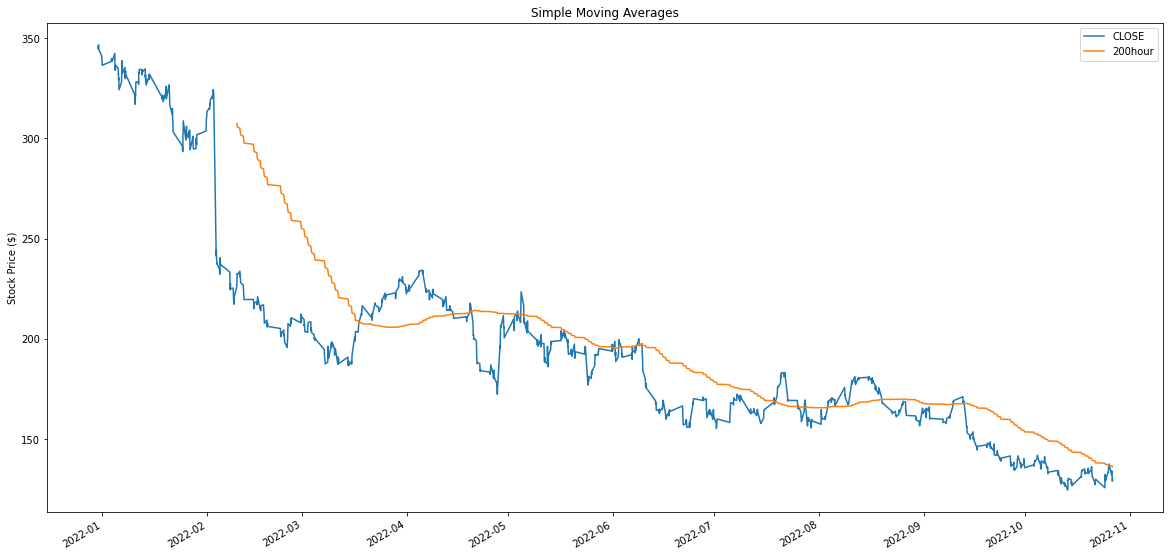

In [7]:
lag = 200

def plot_stock_trend(var, cur_title, stock=stock,logmodelName='Simple MA'):
    ax = stock[['CLOSE',var]].plot(figsize=(20, 10))
    plt.grid(False)
    plt.title(cur_title)
    plt.axis('tight')
    plt.ylabel('Stock Price ($)')
 
def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)  
    """
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))                   
    return rmse

def calculate_mape(y_true, y_pred): 
    """
    Calculate the Mean Absolute Percentage Error (MAPE) %
    """
    y_pred, y_true = np.array(y_pred), np.array(y_true)    
    mape = np.mean(np.abs((y_true-y_pred) / y_true))*100    
    return mape
def calculate_perf_metrics(var,logmodelName='Simple MA'):
    ### RMSE 
    rmse = calculate_rmse(np.array(stock[train_size:]['CLOSE']), np.array(stock[train_size:][var]))
    ### MAPE 
    mape = calculate_mape(np.array(stock[train_size:]['CLOSE']), np.array(stock[train_size:][var]))
     
    return rmse, mape

lag_day = str(lag) + 'hour'
    
stock[lag_day] = stock['CLOSE'].rolling(lag).mean()

    
### Plot and performance metrics for SMA model
plot_stock_trend(lag_day, cur_title='Simple Moving Averages', logmodelName='Simple MA')

rmse_sma, mape_sma = calculate_perf_metrics(var=lag_day,logmodelName='Simple MA')
rmse_sma
print("RMSE:", '{0:.2f}'.format(rmse_sma))
print("MAPE:",'{0:.2f}%'.format(mape_sma))


PREDICTIONS

In [8]:
len(stock)

1446

In [9]:
stock["DATE"][len(stock)-1]

datetime.date(2022, 10, 26)

In [10]:
from datetime import timedelta
pred=stock[len(stock)-14:len(stock)]

In [11]:
from datetime import timedelta
d=stock["DATE"][len(stock)-1]
for i in range(7):
  pred["DATE"][i]=d+timedelta(days=1)

for i in range(7,14):
    pred["DATE"][i]=d+timedelta(days=2)

pred['Date-time'] = pd.to_datetime(pred.DATE.astype(str) + ' ' + pred.TIME.astype(str))
pred=pred.set_index(pd.DatetimeIndex(pred['Date-time'].values))
new=pd.concat([stock,pred])
for k in range(14):
  new["CLOSE"][k]=new["200hour"][len(stock)-200+k:len(stock)+k].mean()
  new['200hour'][k]=new["CLOSE"][len(stock)-200+k+1:len(stock)+k+1].mean()

pred["CLOSE"]=new["CLOSE"]
pred['200hour']=new["200hour"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if 

In [12]:
pred

,TICKER,PER,DATE,TIME,OPE<N,HIGH,LOW,CLOSE,VOL,OPENINT,Date-time,200hour
2022-10-27 16:00:00,META.US,60,2022-10-27,16:00:00,130.8750,134.93,130.5900,133.7400,4739774,0,2022-10-27 16:00:00,137.209799
2022-10-27 17:00:00,META.US,60,2022-10-27,17:00:00,133.7167,134.66,133.2701,133.7050,4048938,0,2022-10-27 17:00:00,137.127293
2022-10-27 18:00:00,META.US,60,2022-10-27,18:00:00,133.7200,135.55,133.6500,135.0300,3463923,0,2022-10-27 18:00:00,137.052589
2022-10-27 19:00:00,META.US,60,2022-10-27,19:00:00,135.0200,136.20,134.8000,136.0800,2988883,0,2022-10-27 19:00:00,136.975639
2022-10-27 20:00:00,META.US,60,2022-10-27,20:00:00,136.0800,136.46,135.0700,135.6050,3061245,0,2022-10-27 20:00:00,136.885791
2022-10-27 21:00:00,META.US,60,2022-10-27,21:00:00,135.5900,137.73,135.5300,137.4401,4176980,0,2022-10-27 21:00:00,136.823992
2022-10-27 22:00:00,META.US,60,2022-10-27,22:00:00,137.4600,138.35,137.1200,137.5100,7424942,0,2022-10-27 22:00:00,136.762542
2022-10-28 16:00:00,META.US,60,2022-10-28,16:00:00,131.6800,133.75,130.5700,132.1450,5345155,0,2022-10-28 16:00:00,136.670467
2022-10-28 17:00:00,META.US,60,2022-10-28,17:00:00,132.1600,135.05,132.1600,133.9500,4539999,0,2022-10-28 17:00:00,136.585967
2022-10-28 18:00:00,META.US,60,2022-10-28,18:00:00,133.9700,135.55,133.9600,134.1300,3418989,0,2022-10-28 18:00:00,136.506617
